首先我们导入数据并观察一下数据的具体特征

由于数据集的标签有问题，我们需要先进行校正

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tmp = pd.read_csv("Database.csv")
# p=tmp['Class'][4]
# q=tmp['Class'][5]
for i in range(tmp.shape[0]):
    if tmp['Class'][i]=="良性 ":# 不知道为啥会多出来一个空格在末尾，查了好久的错误。。。
        tmp['Class'][i]="良性"
    elif tmp['Class'][i]=="恶性 ":
        tmp['Class'][i]="恶性"
tmp['Class'].value_counts()
wh = tmp
wh.head(10)

,Code,ClumpThickness,CellSize,CellShape,MarginalAdhesion,SECellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,良性
1,1002945,5,4,4,5,7,10,3,2,1,良性
2,1015425,3,1,1,1,2,2,3,1,1,良性
3,1016277,6,8,8,1,3,4,3,7,1,良性
4,1017023,4,1,1,3,2,1,3,1,1,良性
5,1017122,8,10,10,8,7,10,9,7,1,恶性
6,1018099,1,1,1,1,2,10,3,1,1,良性
7,1018561,2,1,2,1,2,1,3,1,1,良性
8,1033078,2,1,1,1,2,1,1,1,5,良性
9,1033078,4,2,1,1,2,1,2,1,1,良性


猜测编码Code应该是病人的编号，对我们的分类器构建不起作用，因此将其从数据集中剔除

In [130]:
wh=wh.drop(['Code'],axis=1)
wh.head(10)

,ClumpThickness,CellSize,CellShape,MarginalAdhesion,SECellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,良性
1,5,4,4,5,7,10,3,2,1,良性
2,3,1,1,1,2,2,3,1,1,良性
3,6,8,8,1,3,4,3,7,1,良性
4,4,1,1,3,2,1,3,1,1,良性
5,8,10,10,8,7,10,9,7,1,恶性
6,1,1,1,1,2,10,3,1,1,良性
7,2,1,2,1,2,1,3,1,1,良性
8,2,1,1,1,2,1,1,1,5,良性
9,4,2,1,1,2,1,2,1,1,良性


In [131]:
print(wh.shape)

(699, 10)


该数据集包含700个样本，每一个样本是一个10维向量，即有10个属性

我们来观察一下几个属性的分布情况

In [132]:
wh[["ClumpThickness","CellSize","CellShape","MarginalAdhesion"]].describe()

,ClumpThickness,CellSize,CellShape,MarginalAdhesion
count,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867
std,2.815741,3.051459,2.971913,2.855379
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000


接下来我们分析一下特征之间的相关性

In [133]:
wh['Class']

0      良性
1      良性
2      良性
3      良性
4      良性
       ..
694    良性
695    良性
696    恶性
697    恶性
698    恶性
Name: Class, Length: 699, dtype: object

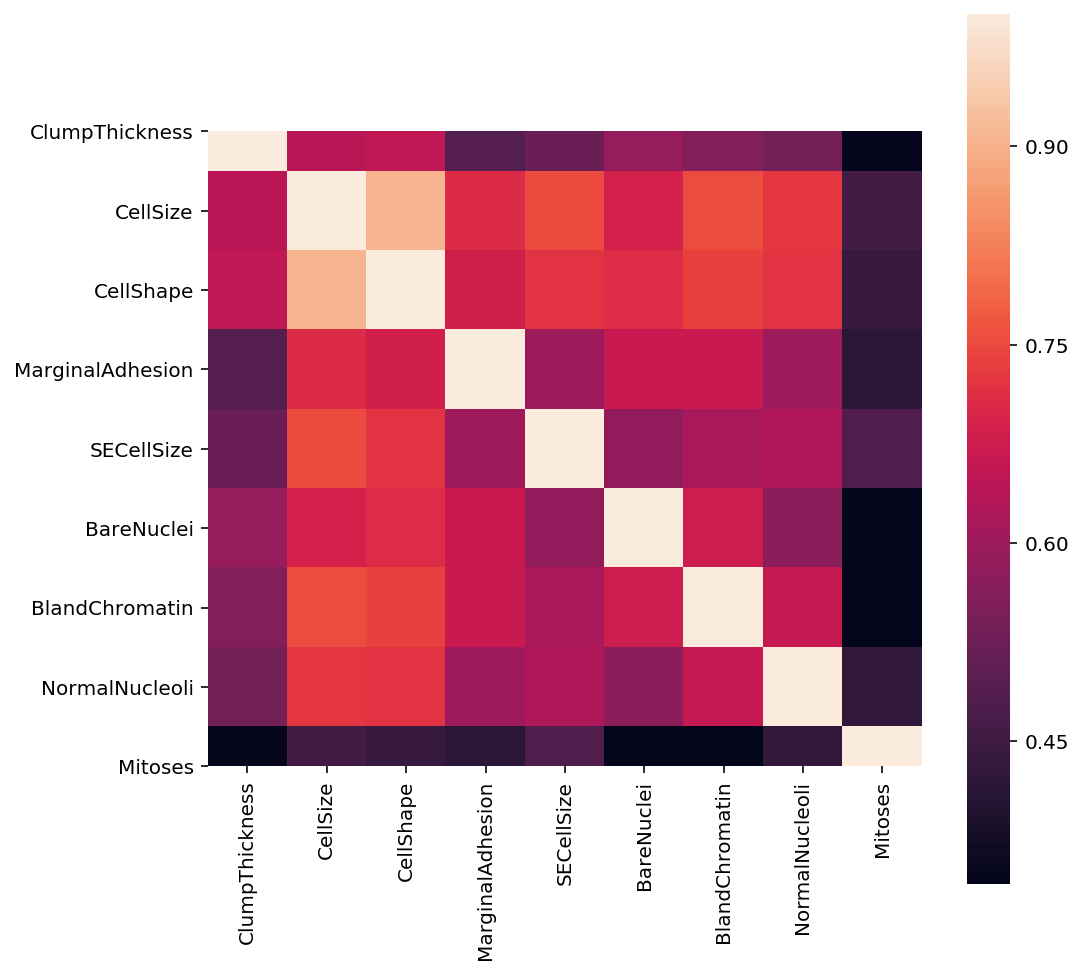

In [22]:
wh_key=wh.drop(['Class'],axis=1)
# wh_key=wh
corrmat=wh_key.corr()
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(corrmat, square=True)

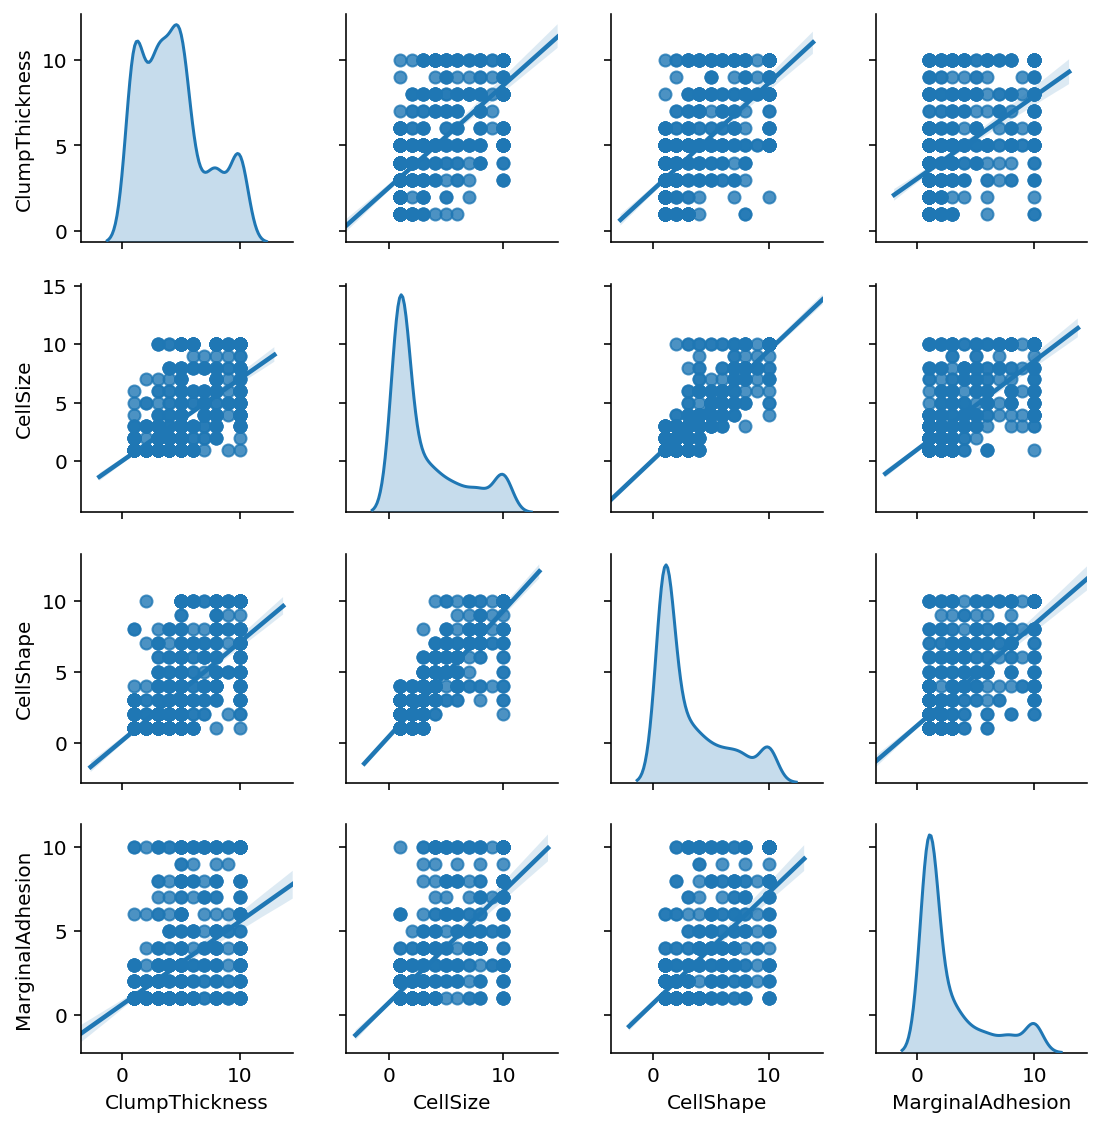

In [25]:
sns.pairplot(wh_key[['ClumpThickness','CellSize','CellShape','MarginalAdhesion']], kind='reg', diag_kind='kde', diag_kws=dict(shade=True), size=2) 

In [92]:
from sklearn.model_selection import train_test_split
# it = wh['Class'][0]
# coldict={}
# coldict={
#     'Class':{"良性 ": 0,"恶性": 1}
# }
# wh['Class']=wh['Class'].map(coldict['Class'])

In [134]:
y = wh['Class']
# del wh['Class']
X  = wh.drop(['Class'],axis=1)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=0)

In [135]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
wh_model = DecisionTreeClassifier(min_samples_leaf = 6)
wh_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

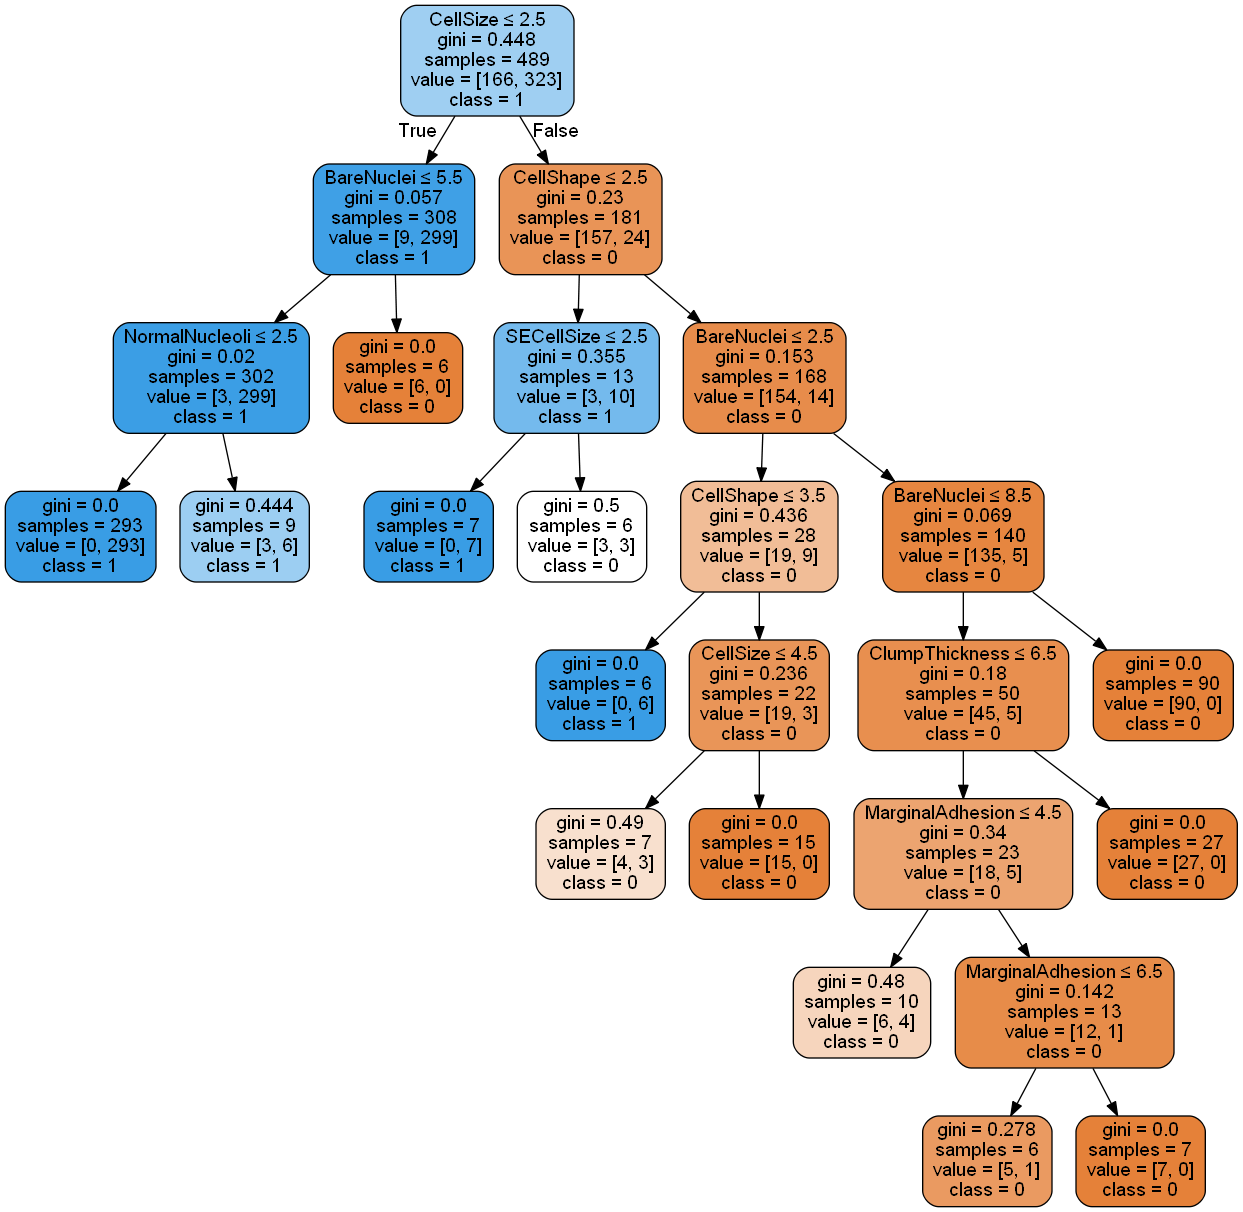

In [145]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
import pydotplus
dot_data = StringIO()  
tree.export_graphviz(wh_model, out_file = dot_data,  
                         feature_names = X_train.columns,
                         class_names=["0","1"],# 0 代表良性，1代表恶性
                         filled = True, rounded = True, special_characters = True
                         )  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [146]:
wh_pred = wh_model.predict(X_test)

In [147]:
from sklearn import metrics
print(metrics.classification_report(y_test, wh_pred))
print(metrics.confusion_matrix(y_test, wh_pred))
print(metrics.accuracy_score(y_test,wh_pred))

              precision    recall  f1-score   support

          恶性       0.85      0.97      0.91        75
          良性       0.98      0.90      0.94       135

    accuracy                           0.93       210
   macro avg       0.92      0.94      0.92       210
weighted avg       0.94      0.93      0.93       210

[[ 73   2]
 [ 13 122]]
0.9285714285714286
